Import the relevant libraries.

Hint: You need to import matplotlib.pyplot instaed of matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the csv file. Make sure to df.head() to ensure it is valid.

In [2]:
df = pd.read_csv('UberDataset Current.csv')

1. Look in the 'CATEGORY' tab. Create a sum of the miles for each category, and then graph it as a bar chart.

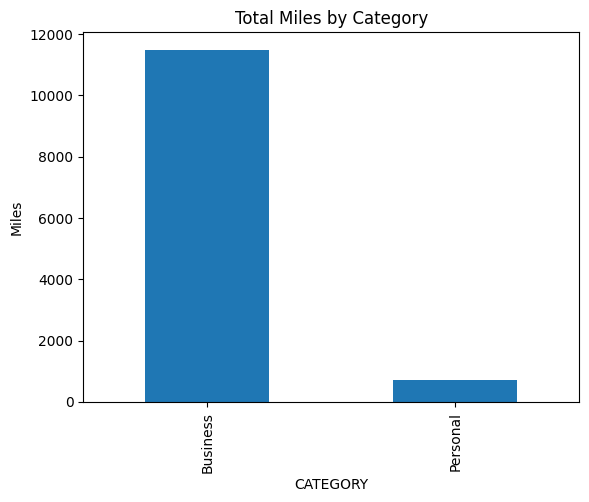

In [3]:
# Compare total miles for Business vs Personal (pandas)
ex1_data = df.groupby('CATEGORY')['MILES'].sum()
ex1_data.plot(kind='bar')
plt.title('Total Miles by Category')
plt.ylabel('Miles')
plt.show()

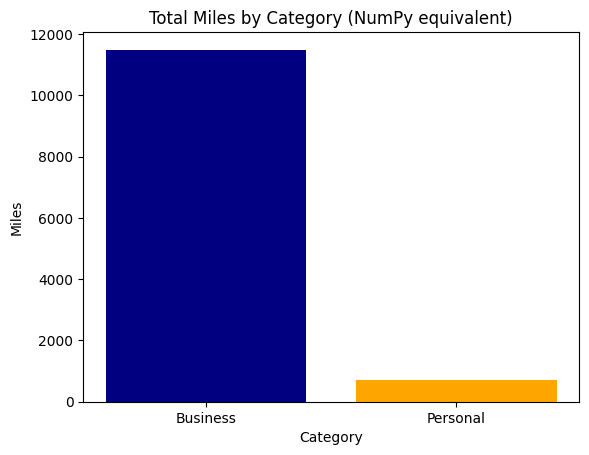

In [4]:
#numpy
categories = df['CATEGORY'].to_numpy()
miles = df['MILES'].to_numpy()

unique_categories = np.unique(categories)

# Calculate sum of miles for each category using numpy
category_miles_sum = {}
for cat in unique_categories:
    category_miles_sum[cat] = miles[categories == cat].sum()

# Prepare data for plotting
plot_categories = list(category_miles_sum.keys())
plot_miles_sums = list(category_miles_sum.values())

plt.bar(plot_categories, plot_miles_sums, color=['navy', 'orange'])
plt.title('Total Miles by Category (NumPy equivalent)')
plt.xlabel('Category')
plt.ylabel('Miles')
plt.show()

2. Similarily, aggregate the number of rides that occured on each day of the week. Plot it on a bar chart.

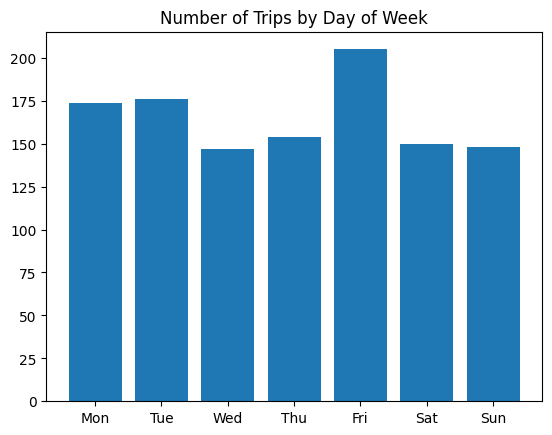

In [5]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ex2_counts = df['day_of_week'].value_counts().sort_index()
# plt.figure()
plt.bar(day_names, ex2_counts)
plt.title('Number of Trips by Day of Week')
plt.show()

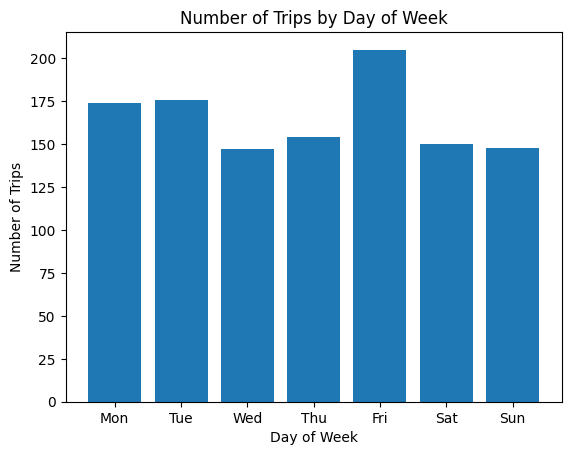

In [6]:
#numpy
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
days = df['day_of_week'].to_numpy()
unique_days, counts = np.unique(days, return_counts=True)

plt.bar(day_names, counts)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()

3. Calculate the mean of all the ride durations, in minutes.

Similarily, find the mean of the mileage of all rides.

In [7]:
# Convert to datetime and subtract
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

df['DURATION_MIN'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
print("Average Trip Duration (Minutes):", df['DURATION_MIN'].mean())
print("Average Trip Miles:", df['MILES'].mean())

Average Trip Duration (Minutes): 23.250433275563257
Average Trip Miles: 10.57313691507799


In [8]:
#numpy
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df['DURATION_MIN'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

durations = df['DURATION_MIN'].to_numpy()
miles = df['MILES'].to_numpy()
duration_mean = np.nanmean(durations)
miles_mean = np.nanmean(miles)
print("Average Trip Duration (Minutes):", duration_mean)
print("Average Trip Miles:", miles_mean)

Average Trip Duration (Minutes): 23.250433275563257
Average Trip Miles: 10.57313691507799


4. To better understand if these stats can be reprsentative, let's see if we have extreme values. Calculate the lower and upper bound MILES via IQR.

Lower bound = Q1 - 1.5 * IQR

Upper bound = Q3 + 1.5 * IQR

In [9]:
# Calculate IQR for Miles
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
miles_lower_bound = Q1 - 1.5 * IQR
miles_upper_bound = Q3 + 1.5 * IQR

outliers1 = df[(df['MILES'] < miles_lower_bound) | (df['MILES'] > miles_upper_bound)]
print(f"Number of statistical outliers in MILES: {len(outliers1)}")
print(outliers1['MILES'])

Number of statistical outliers in MILES: 77
27       68.4
28      133.6
34       23.8
36      195.3
46       36.6
        ...  
1038     23.2
1044     27.2
1046     31.7
1062     63.7
1153    107.0
Name: MILES, Length: 77, dtype: float64


In [10]:
#numpy
Q1 = np.percentile(miles, 25)
Q3 = np.percentile(miles, 75)

outliers1 = df[(df['MILES'] < miles_lower_bound) | (df['MILES'] > miles_upper_bound)]
print(f"Number of statistical outliers in MILES: {len(outliers1)}")
print(outliers1['MILES'])


Number of statistical outliers in MILES: 77
27       68.4
28      133.6
34       23.8
36      195.3
46       36.6
        ...  
1038     23.2
1044     27.2
1046     31.7
1062     63.7
1153    107.0
Name: MILES, Length: 77, dtype: float64


5. Do the same thing as above, only this time find the outliers for hours.

In [12]:
# Solution same for numpy and pandas

Q1_time = np.percentile(durations, 25)
Q3_time = np.percentile(durations, 75)
IQR = Q3_time - Q1_time
time_lower_bound = Q1_time - 1.5 * IQR
time_upper_bound = Q3_time + 1.5 * IQR

outliers = df[(df['DURATION_MIN'] < time_lower_bound) | (df['DURATION_MIN'] > time_upper_bound)]
print(f"Number of statistical outliers in MINUTES: {len(outliers)}")
print(outliers['DURATION_MIN'])

Number of statistical outliers in MINUTES: 62
27       73.0
28      114.0
36      206.0
46       67.0
54       61.0
        ...  
1015     62.0
1035     58.0
1041     70.0
1062     67.0
1153    126.0
Name: DURATION_MIN, Length: 62, dtype: float64


6. To better understand the distribution of mileage between days of the week, create a matrix table to visually represent the dataset. Three columns should be considered: day_of_week, CATEGORY, and MILES.

Hint: Use df.pivot_table()



In [13]:
# Create a matrix summary
pivot = df.pivot_table(index='day_of_week', columns='CATEGORY', values='MILES', aggfunc='sum')
print("Total Miles by Day and Category:")
print(pivot)

Total Miles by Day and Category:
CATEGORY     Business  Personal
day_of_week                    
0              1309.6      77.8
1              1401.2      80.5
2              1205.4      44.5
3              1780.9      37.1
4              2512.0      79.7
5              1790.7     185.6
6              1483.9     212.5


7. Find the most active routes, and print the first 5. In other words, find the most frequent instances of going from one place to another.

In [14]:
# Combine Start and Stop to find the most popular route
df['ROUTE'] = df['START'] + " -> " + df['STOP']
top_routes = df['ROUTE'].value_counts().head(5)

print("Top 5 Most Frequent Routes:")
print(top_routes)

Top 5 Most Frequent Routes:
ROUTE
NO_DATA -> NO_DATA     86
Morrisville -> Cary    75
Cary -> Morrisville    67
Cary -> Cary           53
Cary -> Durham         36
Name: count, dtype: int64


8. Create a scatterplot that graphs between two variables: Duration and Miles

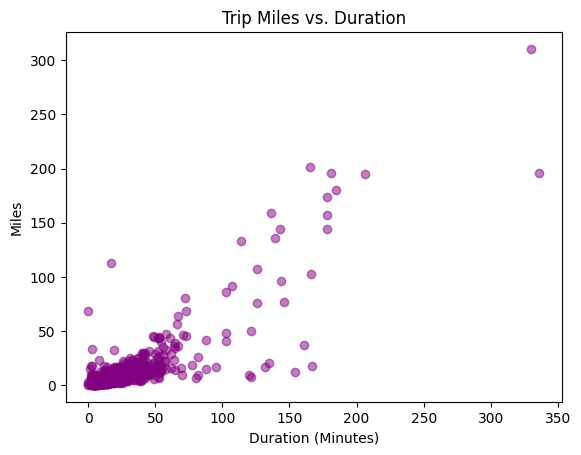

In [15]:
df['DURATION'] = (pd.to_datetime(df['END_DATE']) - pd.to_datetime(df['START_DATE'])).dt.total_seconds() / 60

# Scatter plot
plt.scatter(df['DURATION'], df['MILES'], alpha=0.5, color='purple')
plt.title('Trip Miles vs. Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Miles')
plt.show()

9. Create a histogram that represents the frequency of trips based on duration. Please remember to use a reasonable number of bins in your histogram plot.

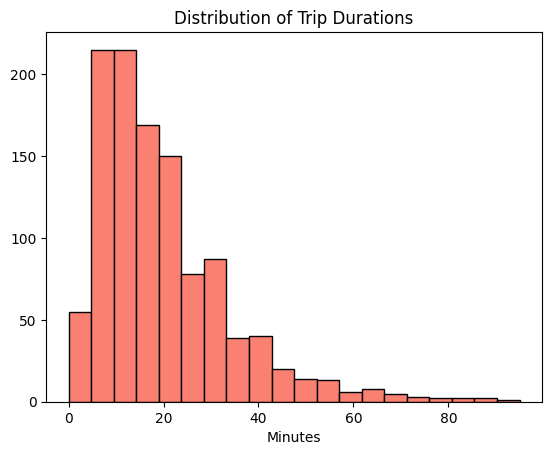

In [16]:
# Distribution of durations under 100 minutes
plt.hist(df[df['DURATION'] < 100]['DURATION'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Minutes')
plt.show()

10. Lastly, please create a piechart to visualize the days with/without rain. For the days that are rainy, call it "rainy". For the days that are not rainy, call it "dry".

Thanks for attending this week's session! :-)

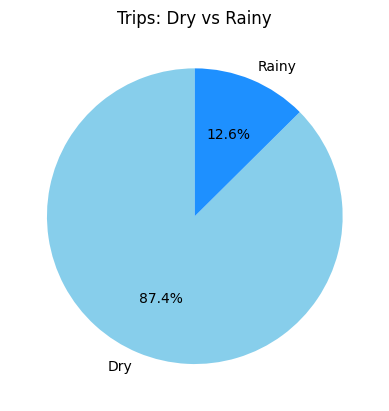

In [17]:
rain_counts = (df['RAIN'] > 0).value_counts()

plt.pie(rain_counts, labels=['Dry', 'Rainy'], autopct='%1.1f%%', colors=['skyblue', 'dodgerblue'], startangle=90)
plt.title('Trips: Dry vs Rainy')
plt.show()